<a href="https://colab.research.google.com/github/SimiMaithani/Simi_INFO5731_Fall2021/blob/main/Simi_INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [2]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [2]:
# Importing the dataset from assignment 3
import pandas as pd
file_df = pd.read_csv("clean_reviews1.csv", encoding = "unicode_escape")
file_df

,document_id,clean_text,sentiment
0,0,embarrassed say paid 50 something replaced pro...,negative
1,1,think ive found time favorite definitely buyin...,positive
2,2,frustrated quality age invisibleshield cracked...,negative
3,3,usually buy cases recently bought really cut c...,neutral
4,4,ordered 11 pro its unbelievable easy install i...,positive
...,...,...,...
495,495,this easiest install ever comes alcohol wiped...,positive
496,496,bought phone multiple times dont think ever pu...,neutral
497,497,mean mean mean amazon realize stupid enough bu...,neutral
498,499,cheap necessary parts install easy install fee...,positive


In [58]:
col_text = file_df['clean_text']
# col_text

# All the preprocessing has been done before 
import nltk
nltk.download('punkt')
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
Tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(nltk.corpus.stopwords.words('english'))
st=PorterStemmer()

file_df['clean_text']= file_df['clean_text'].astype(str)
file_df['Tokenization'] = file_df['clean_text'].apply(lambda x: Tokenizer.tokenize(x))
file_df['Tokens'] = file_df['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
file_df['Stemming'] = file_df['Tokens'].apply(lambda x: [st.stem(i) for i in x])


empty_list = []

# Converting list to string
listToStr = ' '.join(map(str, empty_list))
for i in range(0, len(['Stemming'])):
  empty_list = empty_list + file_df['Stemming'][i]
print(empty_list)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['embarrass', 'say', 'paid', '50', 'someth', 'replac', 'product', 'twice', 'bought', 'store', 'charg', '50', 'broke', 'order', 'replac', 'figur', 'expen', 'replac', 'broke', 'two', 'avail', 'replac', 'never', 'broke', 'year', 'shame', 'upgrad', 'latest', 'paid', 'expen', 'within', 'week', 'crack', 'knew', 'order', 'went', 'right', 'brand', 'wish', 'could', 'give', 'five', 'star']


In [57]:
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

list_2 = []
for empty_list in file_df['Stemming']:
    # Saving the cleaned data in a list that will be used to generate bigrams and trigram
    list_2.append(empty_list)

bi_gram = models.Phrases(list_2, min_count=5, threshold=100)
tri_gram = models.Phrases(bigram[list_2], threshold=100)
bi_gram_mod = models.phrases.Phraser(bi_gram)
tri_gram_mod = models.phrases.Phraser(tri_gram)
print(tri_gram_mod[bi_gram_mod[list_2[0]]])

['embarrass', 'say', 'paid', '50', 'someth', 'replac', 'product', 'twice', 'bought', 'store', 'charg', '50', 'broke', 'order', 'replac', 'figur', 'expen', 'replac', 'broke', 'two', 'avail', 'replac', 'never', 'broke', 'year', 'shame', 'upgrad', 'latest', 'paid', 'expen', 'within', 'week', 'crack', 'knew', 'order', 'went', 'right', 'brand', 'wish', 'could', 'give', 'five', 'star']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [67]:
# (1) Features (top n-gram phrases) used for topic modeling.
import spacy
def bi_grams(list_2):
    return [bi_gram_mod[words] for words in list_2]
  
def tri_grams(list_2):
    return [tri_gram_mod[bi_gram_mod[words]] for words in list_2]

In [73]:
def lem(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    final= []
    for i in list_2:
        words = nlp(" ".join(i)) 
        final.append([token.lemma_ for token in words if token.pos_ in allowed_postags])
    return final

# top n-gram phrases
bi_grams_list2 = bi_grams(list_2)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
Lemmatized_data = lem(bi_grams_list2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(Lemmatized_data[:10])

[['say', 'pay', 'replac', 'product', 'twice', 'buy', 'store', 'charg', 'break', 'order', 'expen', 'replac', 'break', 'avail', 'replac', 'never', 'break', 'year', 'late', 'pay', 'expen', 'week', 'crack', 'know', 'order', 'go', 'right', 'brand', 'wish', 'could', 'give', 'star'], ['think', 'have', 'find', 'time', 'definit', 'buy', 'back', 'love', 'get', 'case', 'crack', 'come', 'can', 'believ', 'well', 'work', 'less', 'stick', 'actual', 'adh', 'back', 'stick', 'pretti', 'need', 'deposit', 'reason', 'cri', 'effort', 'tri', 'dummi', 'proof', 'instruct', 'trust', 'lose', 'realli', 'know', 'would', 'protect', 'go', 'night', 'drop', 'drop', 'solid', 'foot', 'hold', 'phone', 'peopl', 'first', 'see', 'huge', 'crack', 'spider', 'web', 'think', 'job', 'turn', 'effort', 'good', 'thing', 'want', 'slip', 'untouch', 'assembl', 'second', 'screen', 'incid', 'drop', 'weekend', 'judg', 'thing', 'happen', 'crack', 'unarm', 'thu', 'last', 'screen', 'purcha', 'set'], ['age', 'time', 'year', 'last', 'year', '

In [74]:
from gensim import corpora, models

dictionary = corpora.Dictionary(Lemmatized_data)
texts = Lemmatized_data

# Converting the dictionary to bag of wards
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus[:10])

[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(3, 1), (6, 3), (9, 1), (10, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 2), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)], [(24, 2), (49, 1), (52, 2), (68, 1), (77, 1), (86, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1

In [76]:
[[(dictionary[num], freq) for num, freq in corp] for corp in corpus[:1]]

[[('avail', 1),
  ('brand', 1),
  ('break', 3),
  ('buy', 1),
  ('charg', 1),
  ('could', 1),
  ('crack', 1),
  ('expen', 2),
  ('give', 1),
  ('go', 1),
  ('know', 1),
  ('late', 1),
  ('never', 1),
  ('order', 2),
  ('pay', 2),
  ('product', 1),
  ('replac', 3),
  ('right', 1),
  ('say', 1),
  ('star', 1),
  ('store', 1),
  ('twice', 1),
  ('week', 1),
  ('wish', 1),
  ('year', 1)]]

In [87]:
# (2) LDA - Top 10 clusters for topic modeling
from pprint import pprint

lDmodel = models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics = 10,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',per_word_topics=True)
pprint(lDmodel.print_topics())

# Below is the description of the topics generated in the output
# Topic 0 -  Want to buy
# Topic 1 -  Cover installation
# Topic 2 -  Buy back cover
# Topic 3 -  Expensive order
# Topic 4 -  Cracked screen
# Topic 5 -  Great cover installation
# Topic 6 -  Plastic screen cover
# Topic 7 -  Good application of cover
# Topic 8 -  Cover installation instructions
# Topic 9 -  Long lasting feel for cover 

[(0,
  '0.031*"get" + 0.031*"push" + 0.031*"go" + 0.021*"use" + 0.021*"buy" + '
  '0.021*"thumb" + 0.021*"back" + 0.021*"spot" + 0.021*"want" + 0.010*"still"'),
 (1,
  '0.102*"definit" + 0.102*"pack" + 0.052*"unabl" + 0.051*"new" + '
  '0.051*"instal" + 0.051*"cover" + 0.051*"easi" + 0.051*"everyth" + '
  '0.051*"husband" + 0.051*"get"'),
 (2,
  '0.004*"go" + 0.004*"back" + 0.004*"get" + 0.004*"push" + 0.004*"thumb" + '
  '0.004*"cover" + 0.004*"want" + 0.004*"buy" + 0.004*"adh" + 0.004*"spot"'),
 (3,
  '0.092*"replac" + 0.092*"break" + 0.061*"pay" + 0.061*"order" + '
  '0.061*"expen" + 0.031*"right" + 0.031*"crack" + 0.031*"buy" + 0.031*"year" '
  '+ 0.031*"brand"'),
 (4,
  '0.038*"crack" + 0.038*"drop" + 0.025*"thing" + 0.025*"screen" + '
  '0.025*"effort" + 0.025*"stick" + 0.025*"back" + 0.025*"think" + 0.013*"buy" '
  '+ 0.013*"would"'),
 (5,
  '0.036*"great" + 0.036*"feel" + 0.036*"first" + 0.036*"trust" + '
  '0.036*"stupid" + 0.036*"instal" + 0.036*"product" + 0.036*"gap" + '
  

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [89]:
# Write your code here
df2 = pd.read_csv('clean_reviews1.csv',encoding = "unicode_escape")

In [105]:
import glob
import json
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

x_values = df2['clean_text']
y_values = df2['sentiment']

# Defining the values used to train and test the model. As mentioned in the question 20% of the data will be used to 
# test the model and 80% will be used to train the model, hence the test_size value of 0.2

X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print("Logistic Regression Model")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("F1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Logistic Regression Model
Accuracy: 0.65
Precision: 0.21666666666666667
Recall: 0.3333333333333333
F1 score: 0.26262626262626265


In [129]:
# SVM
# Following the same concept that we used for 
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
X_train = vect.fit(X_train).transform(X_train) 
X_test = vect.transform(X_test)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Support Ventor Machines")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average = 'macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(y_test, y_pred,average = 'macro'))

Support Ventor Machines
Accuracy: 0.6476190476190476
Precision: 0.21587301587301588
Recall: 0.3333333333333333
f1 score: 0.26204238921001927


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [3]:
# Write your code here
import pandas as pd
df3_test = pd.read_csv("test.csv", encoding= 'unicode_escape')
df4_train = pd.read_csv("train.csv", encoding= 'unicode_escape')

In [4]:
df3_test.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]>

In [5]:
df4_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>

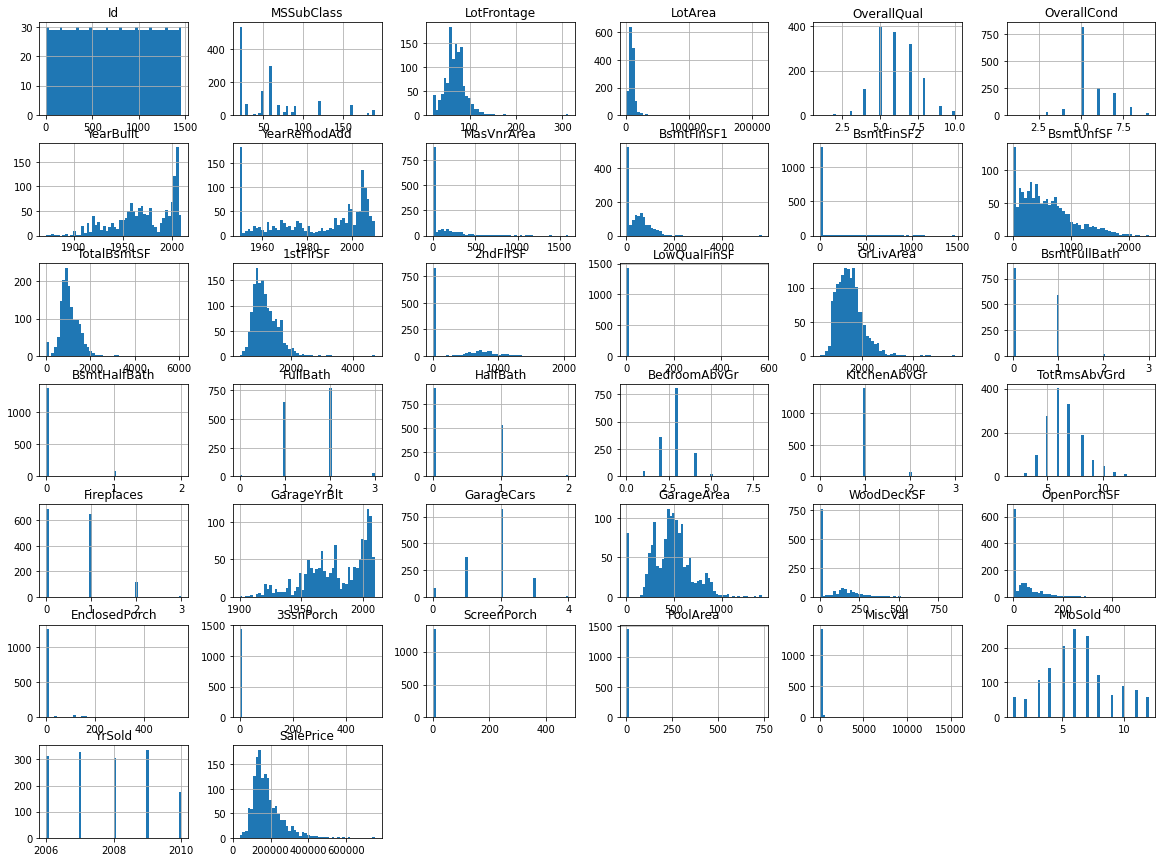

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df4_train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [8]:
#The variable we are trying to predict here is Sales Price. We will find the correlation of all independent variable with 
#the Sales Price variable
corr_matrix = df4_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

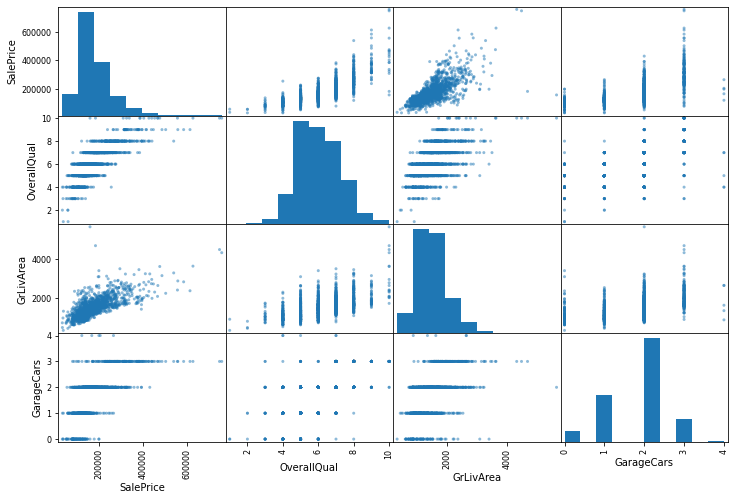

In [127]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]
scatter_matrix(df4_train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [144]:
# LabelEncoder tranforms non-numerical variables to numerical variables
from sklearn.preprocessing import LabelEncoder
non_numerical_columns = ('Foundation','GarageCond', 'LandContour','Electrical', 'RoofMatl','RoofStyle', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')

for index in non_numerical_columns:
    end = LabelEncoder()
    end.fit(list(df4_train[index].values))
    df4_train[index] = end.transform(list(df4_train[index].values))


In [158]:
# Building the regression model
x = df4_train[df4_train.columns[:80]]
y = df4_train['SalePrice']    
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Calculating r-square value
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
rsquare = regressor.predict(xtest)
print("The r-square value is :", regressor.score(x_train,y_train))

The r-square value is : 0.8682781142239373


In [165]:
# Calculating the root-mean square error
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)


Linear Regression RMSE: 97371.7990


In [166]:
# Predicting the sales value
Predicted_sales = pd.DataFrame(rsquare, columns =['Predicted_Sales'])
Predicted_Sales

,Predicted_Sales
0,325008.893224
1,293339.928557
2,213994.155918
3,154648.004840
4,116147.621742
...,...
287,123133.325247
288,208860.377257
289,125519.075084
290,310631.632440
